<!-- feature selection -->

In [ ]:
# wrapper method - forward selection , backward selection
# filter method -
# embeded method - 

In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif,SelectKBest,f_regression      #for anova
from sklearn.feature_selection import chi2

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [15]:
data = pd.read_csv('logistic regression dataset-Social_Network_Ads.csv')

In [16]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
lr = LinearRegression()
# wrapper method haveing 2 types - forward $ backward
sf =SequentialFeatureSelector(lr,k_features=2,forward=True)
# sf =SequentialFeatureSelector(lr,k_features=2,forward=False)

In [19]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [20]:
lb = LabelEncoder()

In [21]:
data["Gender"] =lb.fit_transform(data[['Gender']])

C:\Users\sc024\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
x = data[['User ID','Gender','Age','EstimatedSalary']]

In [23]:
y = data['Purchased']

In [24]:
sf=sf.fit(x,y)

In [25]:
sf.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([ 0.42942372, -0.79452136,  0.14768353,  0.21650696,  0.33474688]),
  'avg_score': 0.06676794570595598,
  'feature_names': ('Age',),
  'ci_bound': 0.5673129937758926,
  'std_dev': 0.44138878281263644,
  'std_err': 0.2206943914063182},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([ 0.27902228, -0.39635865,  0.30645375,  0.34740165,  0.22981788]),
  'avg_score': 0.15326738086066993,
  'feature_names': ('Age', 'EstimatedSalary'),
  'ci_bound': 0.35661541286189713,
  'std_dev': 0.277458906709828,
  'std_err': 0.13872945335491396}}

In [26]:
pd.DataFrame.from_dict(sf.get_metric_dict())

,1,2
feature_idx,"(2,)","(2, 3)"
cv_scores,"[0.42942372462204026, -0.7945213569858367, 0.1...","[0.2790222826028107, -0.39635865043511687, 0.3..."
avg_score,0.066768,0.153267
feature_names,"(Age,)","(Age, EstimatedSalary)"
ci_bound,0.567313,0.356615
std_dev,0.441389,0.277459
std_err,0.220694,0.138729


In [27]:
# filter method- 
#  variance threshold- 
# co-relation -
# chi  square testing-
#  anova testing -

In [28]:
th = VarianceThreshold(threshold=0.5)

In [29]:
xtrain,xtest,ytrain ,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
th.fit(xtrain)

VarianceThreshold(threshold=0.5)

In [31]:
th.get_support()                  # true columns are above the threshold value & false column is below the value of threshold,,so we remove the true columns 

array([ True, False,  True,  True])

In [32]:
sum(th.get_support())                     # 3 columns above the threshold          

3

In [33]:
c=xtrain.columns[th.get_support()]                   #it will display the columnname

In [34]:
c

Index(['User ID', 'Age', 'EstimatedSalary'], dtype='object')

In [ ]:
# another example of variance threshold where data are cotant in feature
# variance threshold will remove the feature automatically where it found constant data

In [38]:
newdata=[[0,2,7,3],[0,8,8,3],[0,1,5,3]]

In [39]:
newdata

[[0, 2, 7, 3], [0, 8, 8, 3], [0, 1, 5, 3]]

In [40]:
v= VarianceThreshold()

In [41]:
v.fit_transform(newdata)

array([[2, 7],
       [8, 8],
       [1, 5]])

<Axes: >

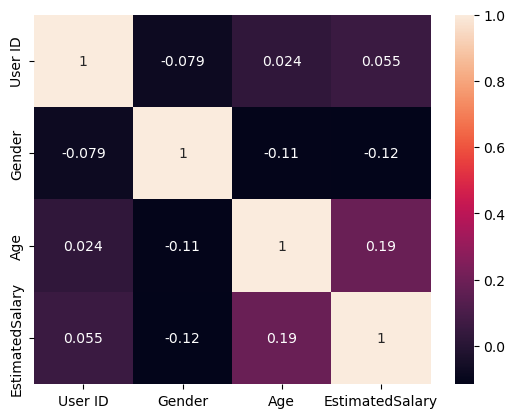

In [43]:
sns.heatmap(xtrain.corr(),annot=True)                   #corelation

In [ ]:
# anova 

In [40]:
st = SelectKBest(f_classif, k=2).fit(xtrain,ytrain)

In [41]:
xtrain.columns[st.get_support()]

Index(['Age', 'EstimatedSalary'], dtype='object')

In [ ]:
# chi square

In [43]:
ch = chi2(xtrain,ytrain)             #calculate chi square state

In [45]:
p=pd.Series(ch[1],index=xtrain.columns)

In [46]:
p

User ID            3.882583e-12
Gender             1.865164e-01
Age                8.680379e-80
EstimatedSalary    0.000000e+00
dtype: float64

In [48]:
p.sort_values(inplace = True)

<Axes: >

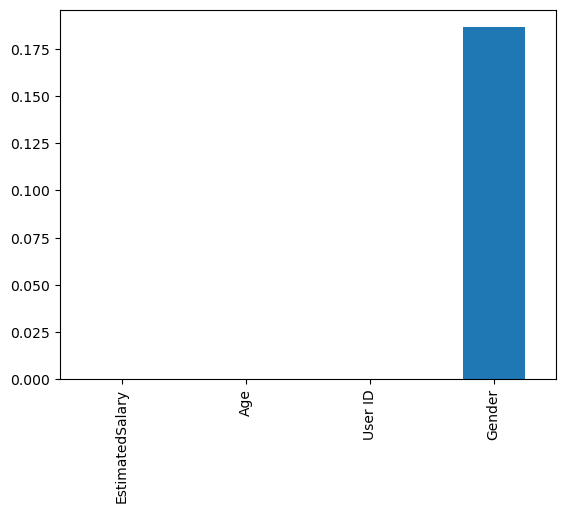

In [49]:
p.plot.bar()